# Assignment #3 - Training
## Convolutional Neural Networks
Author: **Jakub Biegas**
Student index: **260344**

### Import AffNIST Dataset

In [14]:
from assignment_1.dataset import AffnistDataset

affnist_dataset = AffnistDataset(
    training_data_path="../assignment_1/data/processed/affnist/training_batches",
    test_data_path="../assignment_1/data/processed/affnist/test_batches",
)
X_train, X_test, y_train, y_test = (
    affnist_dataset.X_train,
    affnist_dataset.X_test,
    affnist_dataset.y_train,
    affnist_dataset.y_test,
)

X_train.shape, X_test.shape

((50000, 1600), (10000, 1600))

### Plot samples from the Fashion MNIST dataset

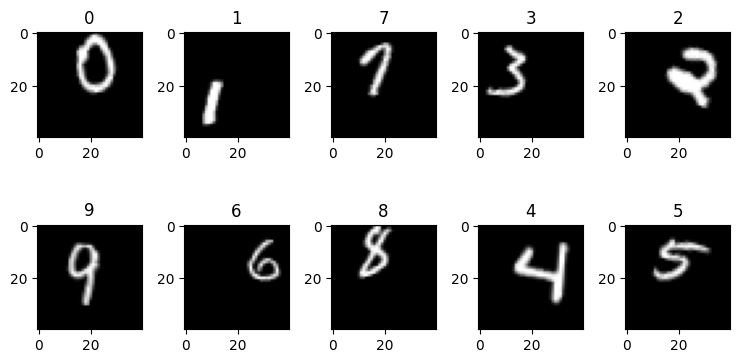

In [15]:
from assignment_3.utils.plot import plot_samples

plot_samples(X_train, y_train, shape=(40, 40))

## Train multiple convolutional autoencoders with different hyperparameters

### Autoencoder 1
#### Model:
- **convolutional layers:** 2
- **batch size:** 128
- **epochs:** 500
- **learning rate:** 0.01
- **shuffle batches:** true

In [5]:
from assignment_3.layers import ConvLayer, MaxPoolLayer, DenseLayer, ReshapeLayer
from assignment_3.utils.weights import HeWeightInitializer
from assignment_3.networks import Autoencoder
from assignment_3.utils.activation_functions import ReLUActivation


layers = [
    ConvLayer(
        channels_in=1,
        channels_out=8,
        kernel_size=3,
        activation_function=ReLUActivation(),
    ),
    MaxPoolLayer(pool_size=2, stride=2),
    ConvLayer(
        channels_in=8,
        channels_out=16,
        kernel_size=3,
        activation_function=ReLUActivation(),
    ),
    MaxPoolLayer(pool_size=2, stride=2),
    ReshapeLayer(),
    DenseLayer(
        input_dim=16 * 5 * 5,
        num_of_neurons=128,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
    DenseLayer(
        input_dim=128,
        num_of_neurons=784,
        weight_initializer=HeWeightInitializer(),
        activation_function=ReLUActivation(),
    ),
]

autoencoder = Autoencoder(layers)

In [6]:
from assignment_3.utils.optimizers import MiniBatchOptimizer
from assignment_3.utils.loss_functions import MeanSquaredError

autoencoder_optimizer = MiniBatchOptimizer(
    autoencoder,
    loss_function=MeanSquaredError(),
    batch_size=128,
    epochs=10,
    learning_rate=0.01,
    shuffle=True,
)
autoencoder_optimizer.optimize(X_train, X_train.reshape(X_train.shape[0], 784))

Started optimization of Autoencoder, classification=False


KeyboardInterrupt: 

In [ ]:
from assignment_3.utils.pickle import dump_pickle

dump_pickle("pickles/autoencoder.pickle", autoencoder)
dump_pickle("pickles/autoencoder_optimizer.pickle", autoencoder_optimizer)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(autoencoder_optimizer.all_loss_values, label="Loss")
plt.legend(loc="upper right")
plt.show()

In [ ]:
from assignment_3.utils.plot import plot_original_and_reconstructed

X_reconstructed = autoencoder.forward(X_test)
plot_original_and_reconstructed(X_test, X_reconstructed, y_test, shape=(40, 40))